In [18]:
!which python

/Users/megatron/Desktop/base/play/bin/python


In [10]:
from ddgs import DDGS #DuckDuckGo has changed the api so we need to update 
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *
import gradio as gr

In [11]:
learn = load_learner('test.pkl')

/Users/megatron/Desktop/base/play/lib/python3.13/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [12]:
learn.predict(PILImage.create('perry.jpg'))

('phineas and ferb', tensor(1), tensor([1.3988e-04, 9.9898e-01, 8.8440e-04]))

In [21]:
def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
download_url(search_images('tom and jerry movie photo', max_images=1)[0], 't&j.jpg', show_progress=False)
Image.open('t&j.jpg').to_thumb(256,256)
learn.predict(PILImage.create('t&j.jpg'))

('tom and jerry', tensor(2), tensor([6.2448e-05, 7.1421e-02, 9.2852e-01]))

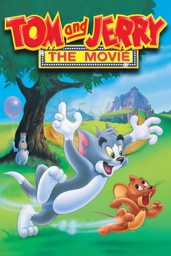

In [22]:
Image.open('t&j.jpg').to_thumb(256,256)

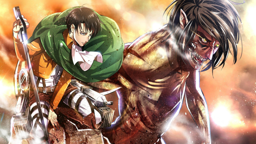

In [23]:
download_url(search_images('attack on titans photo', max_images=1)[0], 'aot.jpg', show_progress=False)
Image.open('aot.jpg').to_thumb(256,256)

In [24]:
learn.predict(PILImage.create('aot.jpg'))

('anime', tensor(0), tensor([9.9927e-01, 5.6140e-04, 1.7098e-04]))

In [30]:
from ddgs import DDGS
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *
import gradio as gr

learn = load_learner('test.pkl')
categories = ('anime', 'phineas and ferb', 'tom & jerry')

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

demo = gr.Interface(
    fn=classify_image,
    inputs=["image"],
    outputs=["label"],
    examples=["perry.jpg","aot.jpg","t&j.jpg"]
)

demo.launch()

In [31]:
classify_image(PILImage.create('aot.jpg'))

{'anime': 0.9992676377296448,
 'phineas and ferb': 0.0005614014808088541,
 'tom & jerry': 0.00017097938689403236}